# Proje Hakkında Bilgiler

Kaggle'dan alınan veri diyabet veri setinin veri bilimi kapsamında incelenmesi

# Veri Seti Hakkında Bilgiler


Veri Seti Linki:https://www.kaggle.com/datasets/mathchi/diabetes-data-set 

 # Veri Setinindeki Sutünların Açıklamaları





    Pregnancies: Number of times pregnant
    Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure: Diastolic blood pressure (mm Hg)
    SkinThickness: Triceps skin fold thickness (mm)
    Insulin: 2-Hour serum insulin (mu U/ml)
    BMI: Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction: Diabetes pedigree function
    Age: Age (years)
    Outcome: Class variable (0 or 1)
    Income($): Monthly income
    Country: Country 
    SmokingStatus: Smoking Status of patient
    DoingSportActively: Does patient doing sport actively or not?
    Name: Name of patient


# Gerekli Kütüphanelerin Yüklenmesi

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("/home/esa/Desktop/Veri Bilimi/Odev/diabetes.csv") # datasetin okunmasi ve bir dataframe aktarılması
np.random.seed(42) #random sayı atamak için seed değerinin ayarlanması
income_values=np.random.randint(300,10001,size=(len(df))) # Rastegele gelir değerlerinin atanması
df['Income($)']=income_values
new_columns={# Verisetimiz kategorik veri içermediğinden isterlerin karşılanması için bazı sutünların içeriklerinin hazırlanamsı.
    'Country':['USA','Canada','UK','Australia','Turkey','Germany','France','Japan','China','Egypt','Russia','Qatar'],
    'SmokingStatus':['Non-Smoker','Former-Smoker','Smoker'],
    'DoingSportActively':['Yes','No']
}


for column, values in new_columns.items(): #Yukarıda hazırlanılan sutünların dataset içerisine random  ve bazı değerlerin 'NaN' değere sahip olacak şekilde datasetine eklenmesi.
    df[column]=np.random.choice(values,size=len(df))

    nan_indices=np.random.choice(df.index,size=int(0.1*len(df)),replace=False)
    df.loc[nan_indices,column]=np.nan

nan_indices = np.random.choice(df.index, size=int(0.1 * len(df)), replace=False)#Rastgele atanan gelir değerlerinin bazılarının boş değer içermesi
df.loc[nan_indices, 'Income($)'] = np.nan

appellations = ['Miss.', 'Mrs.']
first_names = ['Alice', 'Sophia', 'Emma', 'Olivia', 'Ava', 'Teresa', 'Rose', 'Luna', 'Julie', 'Carolina', 'Ayşe', 'Hilal', 'Deniz', 'Abara', 'Abimbola', 'Abioye', 'Adeleke', 'Agu', 'Romina', 'Batul', 'Zary', 'Leilah', 'Rahi']
surnames = ['Smith', 'Johnson', 'Williams', 'Brown', 'Jones', 'Flores', 'Hughes', 'Martinez', 'Rivera', 'Bell', 'Kutlu', 'Yılmaz', 'Aktaş', 'Lazaar', 'Samaha', 'Bassil', 'Khazim', 'Hawari', 'Yaghi']

full_names = [f"{np.random.choice(appellations)} {np.random.choice(first_names)} {np.random.choice(surnames)}" for _ in range(len(df))]


df['Name']=full_names

column_to_move='Outcome'#Hastanın diyabet hastası olup olmadığı etiketinin en son sutün olacak şekilde ayarlananması.
cols=[col for col in df.columns if col!=column_to_move]+[column_to_move]
df=df[cols]




train_df,test_df=train_test_split(df,test_size=0.2,random_state=42) # datasetin train ve test dataframlerine ayrılması

train ve test dataframlerin elde edilmesi.

In [3]:
print(train_df) # train dataframeminin ekrana basılması

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   
..           ...      ...            ...            ...      ...   ...   
71             5      139             64             35      140  28.6   
106            1       96            122              0        0  22.4   
270           10      101             86             37        0  45.6   
435            0      141              0              0        0  42.4   
102            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age  Income($)  Country  SmokingStatus  \
60                      0.304   21    

Diyabet verisetinin train dataframe'i

In [4]:
print(test_df) #test dataframenin ekrana basılması

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6       98             58             33      190  34.0   
324            2      112             75             32        0  35.7   
624            2      108             64              0        0  30.8   
690            8      107             80              0        0  24.6   
473            7      136             90              0        0  29.9   
..           ...      ...            ...            ...      ...   ...   
355            9      165             88              0        0  30.4   
534            1       77             56             30       56  33.3   
344            8       95             72              0        0  36.8   
296            2      146             70             38      360  28.0   
462            8       74             70             40       49  35.3   

     DiabetesPedigreeFunction  Age  Income($)    Country  SmokingStatus  \
668                     0.430   43  

Diyabet verisetinin test dataframe'i

In [5]:
test_age=test_df["Age"] # test dataframe'indeki kişilerin yaş sutünundan yaşlarının elde edilmesi ve ekrana basılması
print(test_age)

668    43
324    21
624    21
690    34
473    50
       ..
355    49
534    24
344    57
296    29
462    39
Name: Age, Length: 154, dtype: int64


Test dataframe'indeki kişilerin yaşları

In [6]:
train_age=train_df["Age"] # train dataframe'indeki kişilerin yaş sutünundan yaşlarının elde edilmesi ve ekrana basılması
print(train_age)

60     21
618    50
346    22
294    65
231    46
       ..
71     26
106    27
270    38
435    29
102    21
Name: Age, Length: 614, dtype: int64


Train dataframe'indeki kişilerin yaşları


In [7]:
print(train_df.columns) # train dataframe'indeki sutünlar ekrana basılması

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Income($)', 'Country',
       'SmokingStatus', 'DoingSportActively', 'Name', 'Outcome'],
      dtype='object')


Train dataframe'indeki sutünlar

In [8]:
print(train_df.dtypes) #train dataframe'indeki sutünların veri tiplerinin ekrana basılması

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Income($)                   float64
Country                      object
SmokingStatus                object
DoingSportActively           object
Name                         object
Outcome                       int64
dtype: object


Train dataframe'indeki sutünların veri tipleri

In [9]:
test_df.head() # test dataframe'inin ilk 5 satırının ekrana basılması

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Income($),Country,SmokingStatus,DoingSportActively,Name,Outcome
668,6,98,58,33,190,34.0,0.430,43,6297.0,UK,Smoker,Yes,Miss. Julie Aktaş,0
324,2,112,75,32,0,35.7,0.148,21,8106.0,UK,Former-Smoker,No,Mrs. Batul Brown,0
624,2,108,64,0,0,30.8,0.158,21,6432.0,Japan,Smoker,Yes,Miss. Abimbola Bassil,0
690,8,107,80,0,0,24.6,0.856,34,3674.0,Canada,Non-Smoker,Yes,Mrs. Abimbola Johnson,0
473,7,136,90,0,0,29.9,0.210,50,6288.0,Russia,NaN,Yes,Mrs. Abioye Samaha,0


Test dataframe'inin ilk 5 satırı

In [10]:
train_df.info() #train dataframe  hakkındaki genel bilgilerin ekrana basılması

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 60 to 102
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
 8   Income($)                 552 non-null    float64
 9   Country                   553 non-null    object 
 10  SmokingStatus             553 non-null    object 
 11  DoingSportActively        548 non-null    object 
 12  Name                      614 non-null    object 
 13  Outcome                   614 non-null    int64  
dtypes: float6

Train dataframe' i hakkında genel bilgiler

In [11]:
train_df.describe() # train dataframe'nindeki sutünların değerleri hakkındaki istatistiksel bilgilerin ekrana basılması

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Income($),Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,552.000000,614.000000
mean,3.742671,120.855049,69.415309,20.399023,81.438111,31.983388,0.469168,32.907166,5293.693841,0.346906
std,3.313264,32.035057,18.512599,15.433974,116.234835,7.740625,0.336847,11.503437,2709.484968,0.476373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,304.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.241500,24.000000,3087.250000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,42.500000,32.000000,0.372500,29.000000,5424.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,129.750000,36.375000,0.613750,40.000000,7566.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,9992.000000,1.000000


Train dataframe'nindeki sutünların değerleri hakkındaki istatistiksel bilgiler

In [12]:
train_df["Pregnancies"] #Train dataframe'indeki 'Pregnancies' sütununa ait bilgilerin ekrana basılması

60      2
618     9
346     1
294     0
231     6
       ..
71      5
106     1
270    10
435     0
102     0
Name: Pregnancies, Length: 614, dtype: int64

Train dataframe'indeki 'Pregnancies' sütununa ait bilgiler

In [13]:
train_df["Pregnancies"].index #Pregnancies sütunundaki değerlerin indexlerinin ,veri tiplerinin ve toplam satır sayısının ekrana basılması

Int64Index([ 60, 618, 346, 294, 231, 340, 535, 306, 718,  90,
            ...
            466, 121, 614,  20, 700,  71, 106, 270, 435, 102],
           dtype='int64', length=614)

Pregnancies sütunundaki değerlerin indexleri ,veri tipleri ve toplam satır sayısı

In [14]:
train_df["Pregnancies"].index.values #Pregnancies sütunundaki değerlerin index değerlerinin ekrana basılması

array([ 60, 618, 346, 294, 231, 340, 535, 306, 718,  90, 377, 235, 158,
        69, 260, 131,  44,  70, 264, 673, 286, 640, 135, 745, 165, 164,
        28, 608, 583, 746, 292, 136, 432, 554, 319, 594,   6, 615, 357,
        73, 352, 497, 145, 514, 291, 132, 559, 631, 719, 395,  41, 637,
       108, 481,  56, 323, 685, 758, 572, 529,  24, 465, 247, 443, 351,
       327, 110,  82,  51, 449, 762, 703, 619, 198, 538, 329, 302, 334,
       139, 485, 547,  18, 593, 140, 326, 266, 626,  83,  61, 632, 735,
        29, 335, 599, 557, 311, 429, 182, 586, 679, 464, 223, 393, 766,
       570, 671, 412, 755, 176, 525, 333, 163, 248, 682,  74, 439, 643,
       104, 114, 749,  92, 380,  89, 417, 477, 713, 707, 506,  11,  43,
        42, 167, 675, 666, 381, 178, 705, 518, 177, 532, 539, 257, 616,
       440,  15, 478, 256, 388, 360, 367, 446, 589, 342, 453, 426,   9,
       249,  22, 221, 526, 751, 752, 424, 644, 203, 500,  93, 369, 332,
       522, 284, 184, 623, 365, 153,  75, 422, 277,  68, 695, 18

Pregnancies sütunundaki değerlerin index değerleri

<BarContainer object of 614 artists>

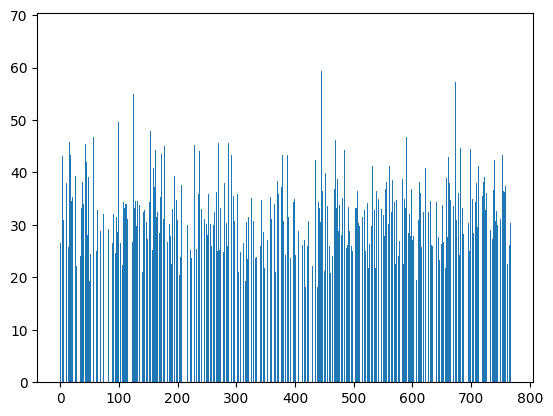

In [15]:
plt.bar(train_df["BMI"].index,train_df["BMI"]) # BMI sütunundaki verilerin x ekseninde index değerleri y sütununda ise BMI değerlerinin ekrana basılması

BMI sütunundaki verilerin x ekseninde index değerleri y sütununda ise BMI değerleri olacak şekilde bar plotta gösterimi

In [16]:
def bar_plot(variable): # bar plot gösterimi için fonksiyon oluşturulması ve gösterim için bazı gösterim parametrelerinin ayarlanması
    var=train_df[variable]
    varValue=var.value_counts()

    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

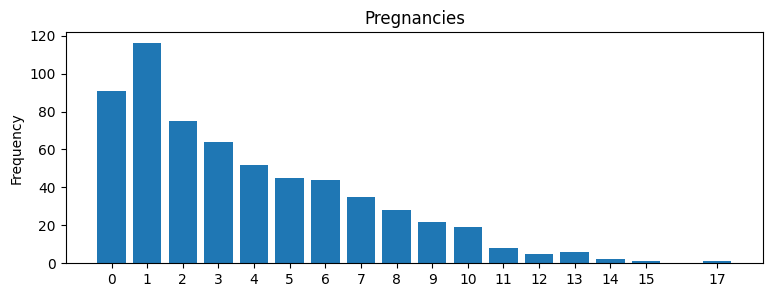

Pregnancies: 
 1     116
0      91
2      75
3      64
4      52
5      45
6      44
7      35
8      28
9      22
10     19
11      8
13      6
12      5
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


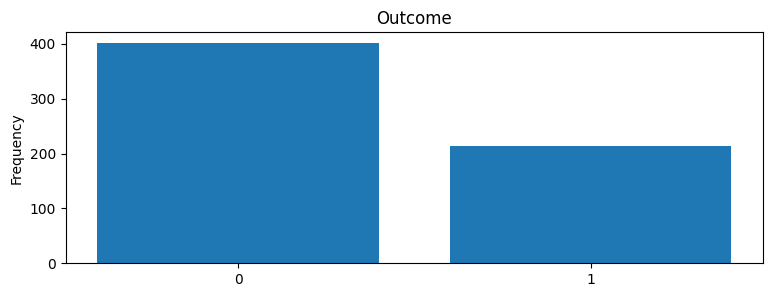

Outcome: 
 0    401
1    213
Name: Outcome, dtype: int64


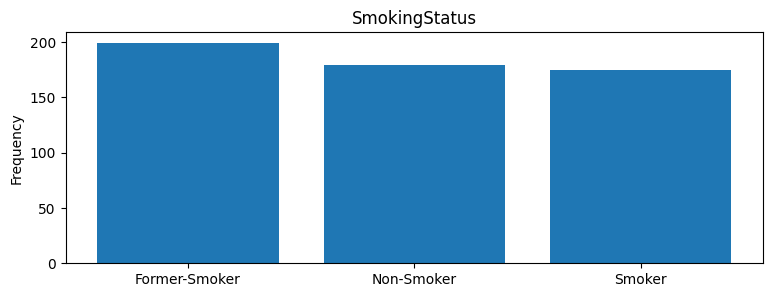

SmokingStatus: 
 Former-Smoker    199
Non-Smoker       179
Smoker           175
Name: SmokingStatus, dtype: int64


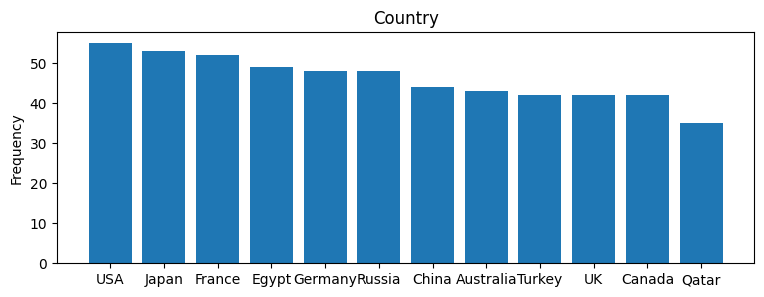

Country: 
 USA          55
Japan        53
France       52
Egypt        49
Germany      48
Russia       48
China        44
Australia    43
Turkey       42
UK           42
Canada       42
Qatar        35
Name: Country, dtype: int64


In [17]:
category1=["Pregnancies","Outcome","SmokingStatus","Country",] # Pregnancies,Outcome,Sigara İçme Durumu ve Gelir Düzeyi sütunlarındaki değerlerin sıklık oranlarının ekrana basılması
for c in category1:
    bar_plot(c)

Pregnancies,Outcome,Sigara İçme Durumu ve Gelir Düzeyi sütunlarındaki değerlerin sıklık oranları

In [18]:
category2=["Age","BMI","Country","DoingSportActively"] #Age ve BMI sütunundaki değerlerin sıklık oranlarının ekrana basılması
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

22    59
21    51
25    40
24    36
23    31
26    30
27    27
28    26
31    21
41    19
29    19
30    17
37    16
33    15
42    14
45    13
46    13
34    12
32    12
36    12
40    11
35    10
38    10
43     9
39     8
52     8
51     7
47     6
50     6
44     5
54     4
49     4
66     4
48     4
57     4
58     3
53     3
59     3
55     3
61     2
60     2
63     2
69     2
67     2
56     2
62     1
64     1
72     1
68     1
70     1
65     1
81     1
Name: Age, dtype: int64 

32.0    12
31.6    11
31.2    10
32.4     9
30.1     9
        ..
42.7     1
39.7     1
41.0     1
36.7     1
39.3     1
Name: BMI, Length: 225, dtype: int64 

USA          55
Japan        53
France       52
Egypt        49
Germany      48
Russia       48
China        44
Australia    43
Turkey       42
UK           42
Canada       42
Qatar        35
Name: Country, dtype: int64 

Yes    281
No     267
Name: DoingSportActively, dtype: int64 



Age ve BMI sütunundaki değerlerin sıklık oranları

In [19]:
def plot_hist(variable): # Verilerin histogram plot gösteriminde gösterilmesi için fonksiyonun hazırlanması ve bazı parameterler vererek görüntülenmek istenen verinin daha anlaşılır olmasını kılmak
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

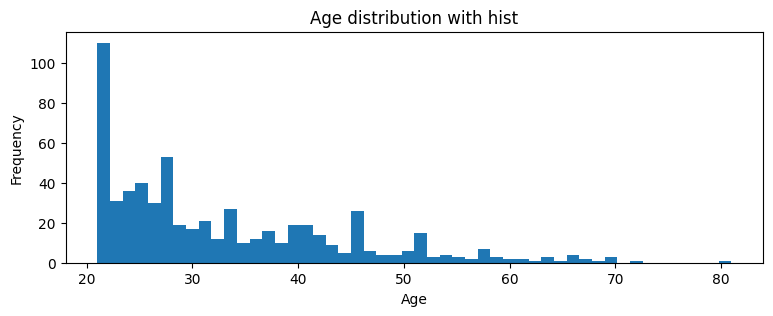

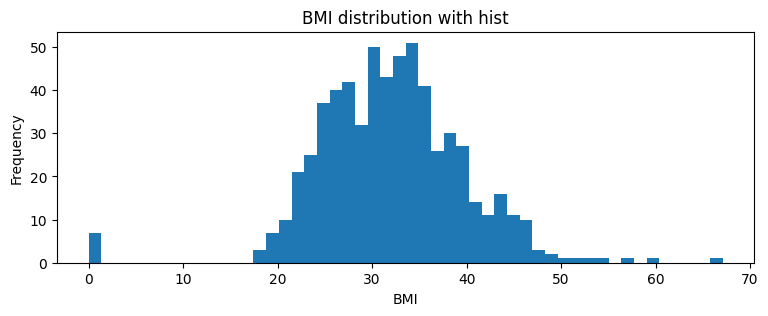

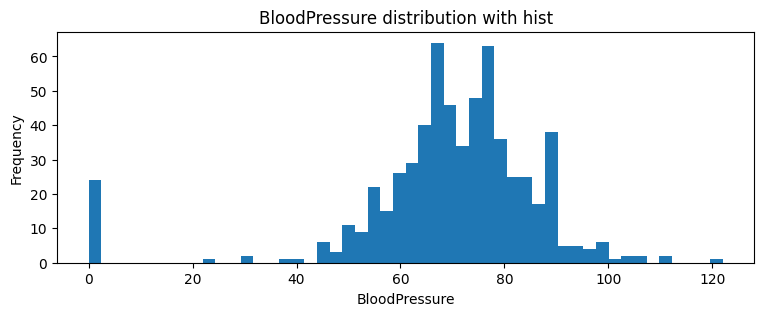

In [20]:
numericVar=["Age","BMI","BloodPressure"]
for n in numericVar:
    plot_hist(n)

'BloodPressure','Age've 'BMI' sütunlarının sıklık oranlarının histogram plotta gösterimi

# BASİT VERİ ANALİZİ

In [21]:
train_df["Glucose"] #Glucose sütunun değerlerinin index numaraları ile ekrana basılması

60      84
618    112
346    139
294    161
231    134
      ... 
71     139
106     96
270    101
435    141
102    125
Name: Glucose, Length: 614, dtype: int64

Glucose sütunun değerleri ve index numaraları 

In [22]:
train_df["DiabetesPedigreeFunction"].head() # Diyabet Pedigri Fonksiyonu sütununun ilk 5 değerinin ekrana basılması

60     0.304
618    1.282
346    0.654
294    0.254
231    0.238
Name: DiabetesPedigreeFunction, dtype: float64

Diyabet Pedigri Fonksiyonu sütununun ilk 5 değerleri

In [23]:
train_df["Outcome"].head() # outcome sütunundaki değerlerin index numaraları ile ekrana basılması

60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64

Outcome sütunundaki ilk 5 değer ve index numaraları

In [24]:
train_df["Insulin"] # Insulin sütunundaki değerlerin index numaraları ile ekrana basılması

60       0
618      0
346     83
294      0
231    370
      ... 
71     140
106      0
270      0
435      0
102      0
Name: Insulin, Length: 614, dtype: int64

Insulin sütunundaki değerler ve  index numaraları

In [25]:
train_df[["Age","Pregnancies"]].groupby(["Age"],as_index="True").mean().sort_values(by="Pregnancies",ascending=True) #Age ve Pregnancies sütunlarının birleştirilmesi ve aynı yaştaki kişilerin hamilelik oranlarının ortalama değerlerlerinin ekrana basılması

,Pregnancies
Age,
65,0.000000
62,0.000000
21,1.058824
22,1.457627
23,1.580645
24,1.805556
25,1.875000
72,2.000000
26,2.100000


In [26]:
train_df["Age"].head()# Age sütunundaki ilk 5 değerin index numaraları ile ekrana basılması

60     21
618    50
346    22
294    65
231    46
Name: Age, dtype: int64

Age sütunundaki ilk 5 değer ve index numaraları

In [27]:
train_df["SkinThickness"].head() #SkinThickness sütunundaki ilk 5 değerin index numaraları ile ekrana basılması

60      0
618    24
346    19
294     0
231    37
Name: SkinThickness, dtype: int64

SkinThickness sütunundaki ilk 5 değer ve index numaraları 

In [28]:
train_df[["Glucose","Outcome"]].groupby(["Glucose"],as_index=False).mean().sort_values(by="Outcome",ascending=True) # Glucose ve Outcome sütunundaki değerlerin indexleri ile birleştirilmesi ve Outcome değerlerinin  her bir Glucose değeri için ortalamasının alınıp ekrana basılması

,Glucose,Outcome
90,153,0.0
22,85,0.0
23,86,0.0
24,87,0.0
26,89,0.0
...,...,...
109,173,1.0
110,174,1.0
111,175,1.0
104,167,1.0


Glucose ve Outcome sütunundaki değerlerin indexleri ile birleştirilmesi ve Outcome değerlerinin  her bir Glucose değeri için ortalaması

In [29]:
train_df["BloodPressure"].head() # BloodPressure sütundaki ilk 5 değerin ekrana basılması

60      0
618    82
346    46
294    50
231    80
Name: BloodPressure, dtype: int64

BloodPressure sütundaki ilk 5 değer

In [30]:
train_df[["Outcome","Age"]].groupby(["Outcome"],as_index="False").mean().sort_values(by="Outcome",ascending=True) #Outcome ve Age sütunlarının herbir outcome değeri için ortalamasının alınıp birleştirilmesi ve ekrana basılması

,Age
Outcome,
0,30.556110
1,37.333333


Outcome ve Age sütunlarının herbir Outcome değeri için ortalamasının alınması birleştirilmiş hali

 # Boş Değerlerin Bulunması

In [31]:
train_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Income($),Country,SmokingStatus,DoingSportActively,Name,Outcome
60,2,84,0,0,0,0.0,0.304,21,9992.0,NaN,Smoker,No,Miss. Agu Yılmaz,0
618,9,112,82,24,0,28.2,1.282,50,5135.0,Egypt,Former-Smoker,Yes,Mrs. Deniz Rivera,1
346,1,139,46,19,83,28.7,0.654,22,8473.0,USA,Former-Smoker,No,Miss. Rahi Yılmaz,0
294,0,161,50,0,0,21.9,0.254,65,3744.0,France,Smoker,Yes,Mrs. Sophia Brown,0
231,6,134,80,37,370,46.2,0.238,46,NaN,Japan,Non-Smoker,No,Miss. Agu Yaghi,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,8192.0,Russia,Smoker,No,Mrs. Abioye Bassil,0
106,1,96,122,0,0,22.4,0.207,27,3031.0,UK,Former-Smoker,NaN,Miss. Rahi Jones,0
270,10,101,86,37,0,45.6,1.136,38,8350.0,Turkey,Non-Smoker,Yes,Mrs. Abimbola Flores,1
435,0,141,0,0,0,42.4,0.205,29,9387.0,Russia,Smoker,Yes,Mrs. Zary Bell,1


In [32]:
train_df_len=len(train_df) #train dataframe'nin uzunluğunun elde edilmesi ve ekrana basılması
train_df_len

614

train dataframe'nin uzunluğu

In [33]:
train_df=pd.concat([train_df,test_df],axis=0).reset_index(drop=True) # Satır bazında train ve test df'lerin birleştirilmesi,yeniden index atanması ve oluşan yeni df'nin boyut bilgilerinin ekrana basılması
train_df.shape 

(768, 14)

 Satır bazında train ve test df'lerin birleştirilmesi,yeniden index atanması ve oluşan yeni df'nin boyut bilgileri

# Boş Değerlerin BUlunması


In [34]:
train_df.columns[train_df.isnull().any()] # Veri setinde boş değer varsa hangi sütuna ait olduğu bilgisinin ekran basılması

Index(['Income($)', 'Country', 'SmokingStatus', 'DoingSportActively'], dtype='object')

Veri setinde boş değer varsa hangi sütuna ait olduğu bilgisi

In [35]:
train_df.isnull().sum()# Verisetindeki sütunların kaç adet boş değer içerdiği bilgisinin ekrana basılması

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Income($)                   76
Country                     76
SmokingStatus               76
DoingSportActively          76
Name                         0
Outcome                      0
dtype: int64

Verisetindeki sütunların kaç adet boş değer içerdiği bilgisi

In [36]:
train_df["Age"] # Age sütun bilgisinin ekrana basılması

0      21
1      50
2      22
3      65
4      46
       ..
763    49
764    24
765    57
766    29
767    39
Name: Age, Length: 768, dtype: int64

Age sütun bilgisi

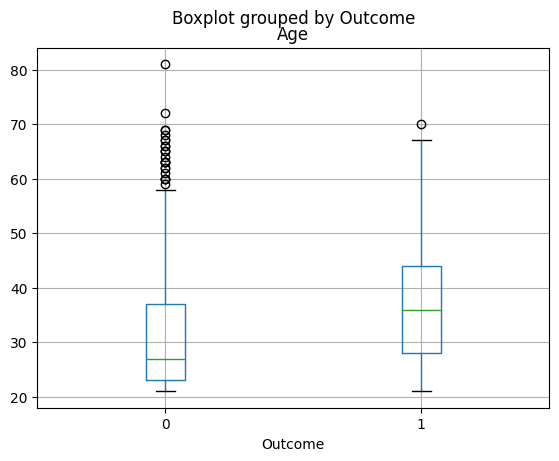

In [37]:
train_df.boxplot(column="Age",by="Outcome") # Outcome değerlerinin Age sütunundaki dağılımlarının ekrana basılması
plt.show()

Outcome değerlerinin Age sütunundaki dağılımları

In [38]:
train_df[train_df["Income($)"].isnull()]# Income sütunundaki null değerlerin satır değerlerinin ekrana basılması

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Income($),Country,SmokingStatus,DoingSportActively,Name,Outcome
4,6,134,80,37,370,46.2,0.238,46,NaN,Japan,Non-Smoker,No,Miss. Agu Yaghi,1
6,4,132,0,0,0,32.9,0.302,23,NaN,UK,Non-Smoker,No,Mrs. Emma Yaghi,1
11,4,171,72,0,0,43.6,0.479,26,NaN,Canada,Non-Smoker,Yes,Mrs. Leilah Smith,1
36,3,78,50,32,88,31.0,0.248,26,NaN,Canada,Former-Smoker,Yes,Miss. Emma Martinez,1
40,3,61,82,28,0,34.4,0.243,46,NaN,USA,Non-Smoker,No,Mrs. Leilah Yaghi,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,2,124,68,28,205,32.9,0.875,30,NaN,China,Smoker,NaN,Miss. Agu Khazim,1
706,2,74,0,0,0,0.0,0.102,22,NaN,Japan,Smoker,Yes,Mrs. Deniz Yılmaz,0
735,2,100,70,52,57,40.5,0.677,25,NaN,Egypt,Former-Smoker,No,Mrs. Deniz Jones,0
759,8,84,74,31,0,38.3,0.457,39,NaN,USA,Former-Smoker,No,Miss. Luna Rivera,0


Income($) sütunundaki null değerlerin satır değerleri

In [39]:
Income_mean=train_df["Income($)"].mean() # Income sütunundaki boş değerlerinin Income değerlerindeki ortalama değer ile doldurulması
train_df["Income($)"]=train_df["Income($)"].fillna(Income_mean)


In [40]:
train_df[train_df["Income($)"].isnull()]#Income sütunundaki varsa ekrana basılması

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Income($),Country,SmokingStatus,DoingSportActively,Name,Outcome


Income sütunundaki boş değerlerin ekrana basılması

# GÖRSELLEŞTİRME

<Axes: >

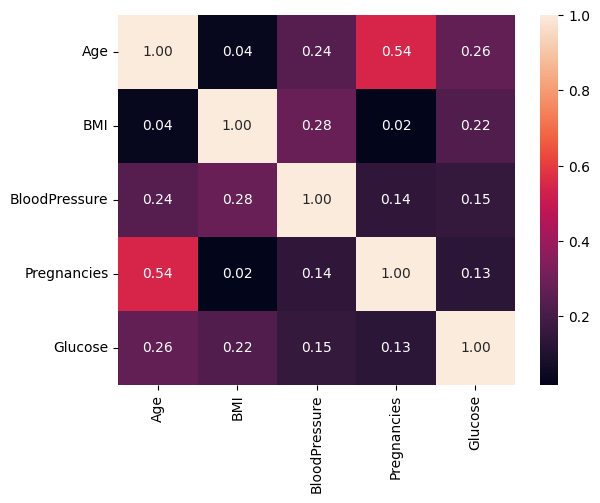

In [41]:
list1=["Age","BMI","BloodPressure","Pregnancies","Glucose"]
sns.heatmap(train_df[list1].corr(),annot=True,fmt=".2f") #Listedeki elemanların birbiriyleriyle ilişkilerinin ekrana basılması

Listedeki elemanların birbiriyleriyle ilişkileri

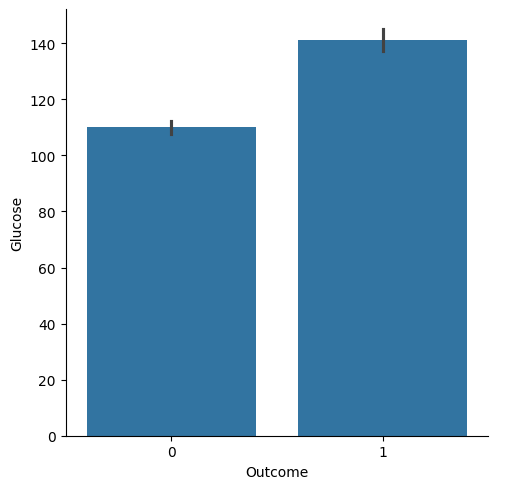

In [42]:
g=sns.catplot(x="Outcome",y="Glucose", kind="bar",data=train_df)# Outcome sütunundaki değerlerin Glucose değerleni göre dağılımlarının ekrana basılması
plt.show()

Outcome sütunundaki değerlerin Glucose değerleni göre dağılımları

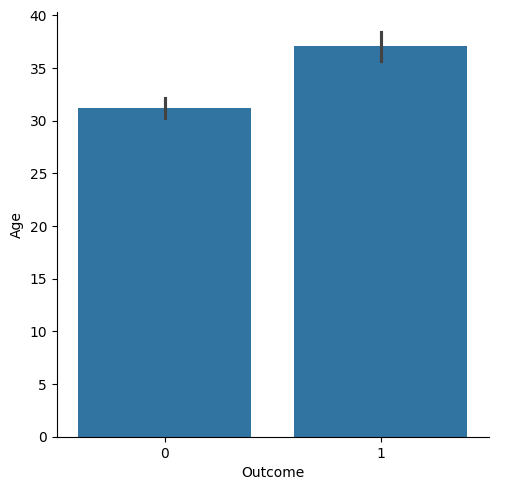

In [43]:
g=sns.catplot(x="Outcome",y="Age", kind="bar",data=train_df)# Outcome sütunundaki değerlerin Age değerlerine göre dağılımlarının ekrana basılması
plt.show()

Outcome sütunundaki değerlerin Age değerlerine göre dağılımları

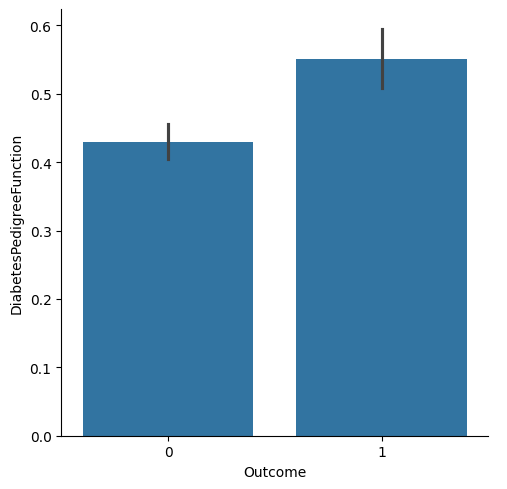

In [44]:
g=sns.catplot(x="Outcome",y="DiabetesPedigreeFunction", kind="bar",data=train_df)# Outcome sütunundaki değerlerin DiabetesPedigreeFunction değerlerine göre dağılımlarının ekrana basılması
plt.show()

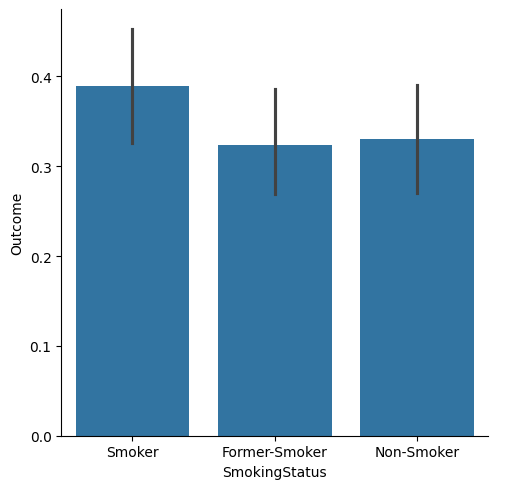

In [45]:
g=sns.catplot(x="SmokingStatus",y="Outcome", kind="bar",data=train_df)# Smoking Status sütunundaki değerlerin Outcome değerlerine göre dağılımlarının ekrana basılması
plt.show()

SmokingStatus sütunundaki değerlerin Outcome değerlerine göre dağılımları

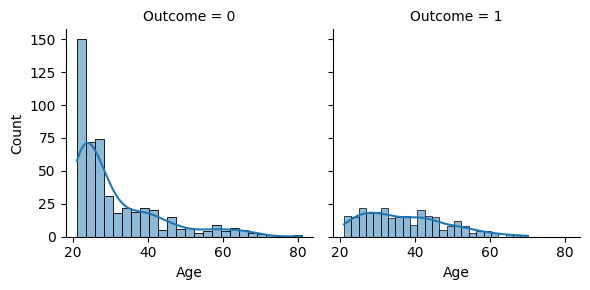

In [46]:
g=sns.FacetGrid(train_df,col="Outcome",col_wrap=2) 
g.map_dataframe(sns.histplot,"Age",bins=25,kde=True) # Outcome değerlerinin Age sütunundaki değerlere göre dağılımın ekran bastırılması
plt.show()

Outcome değerlerinin Age sütunundaki değerlere göre dağılımı

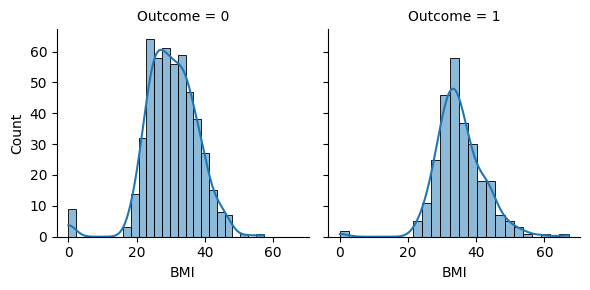

In [47]:
g=sns.FacetGrid(train_df,col="Outcome",col_wrap=2)
g.map_dataframe(sns.histplot,"BMI",bins=25,kde=True) # Outcome değerlerinin BMI sütunundaki değerlere göre dağılımın ekran bastırılması
plt.show()

Outcome değerlerinin BMI sütunundaki değerlere göre dağılımı

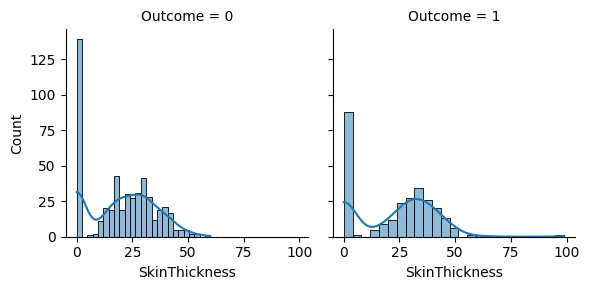

In [48]:
g=sns.FacetGrid(train_df,col="Outcome",col_wrap=2)
g.map_dataframe(sns.histplot,"SkinThickness",bins=25,kde=True) # Outcome değerlerinin SkinThickness sütunundaki değerlere göre dağılımın ekran bastırılması
plt.show()

Outcome değerlerinin SkinThickness sütunundaki değerlere göre dağılımı

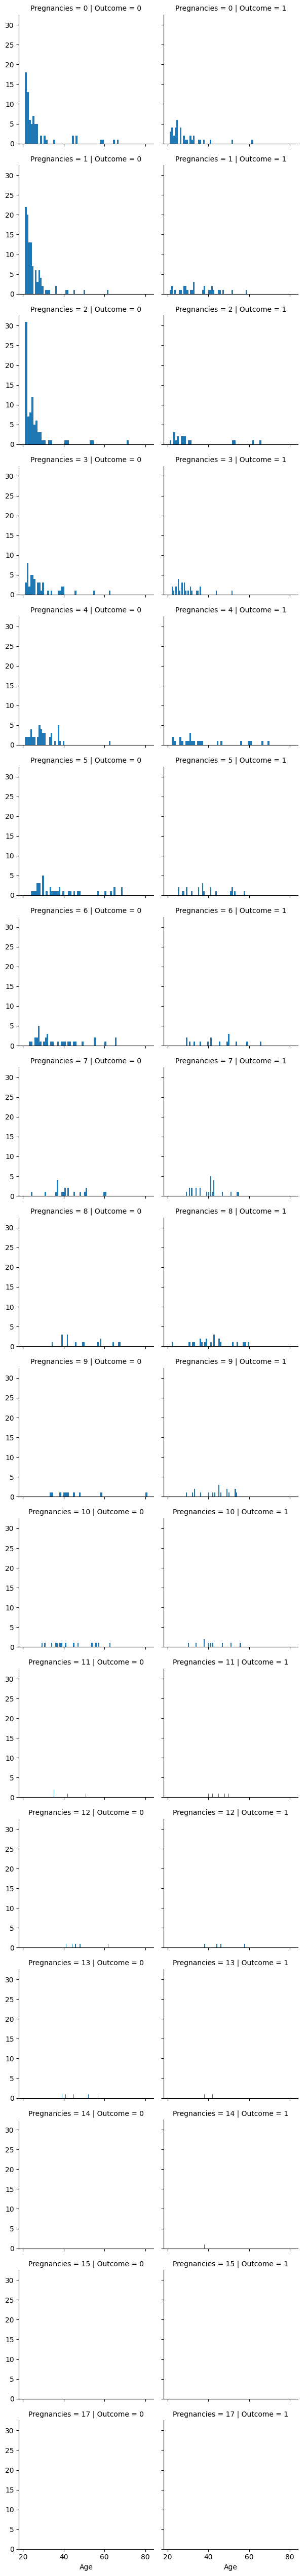

In [49]:
g=sns.FacetGrid(train_df,col="Outcome",row="Pregnancies") # Pregnancies sütunundaki her değerin Outcome sütunundaki her değerle incelenmesi ve Age sütununda göre dağılımının ekrana basılması
g.map(plt.hist,"Age",bins=50)
g.add_legend()
plt.show()

Pregnancies sütunundaki her değerin Outcome sütunundaki her değerle incelenmesi ve Age sütununda göre dağılımı

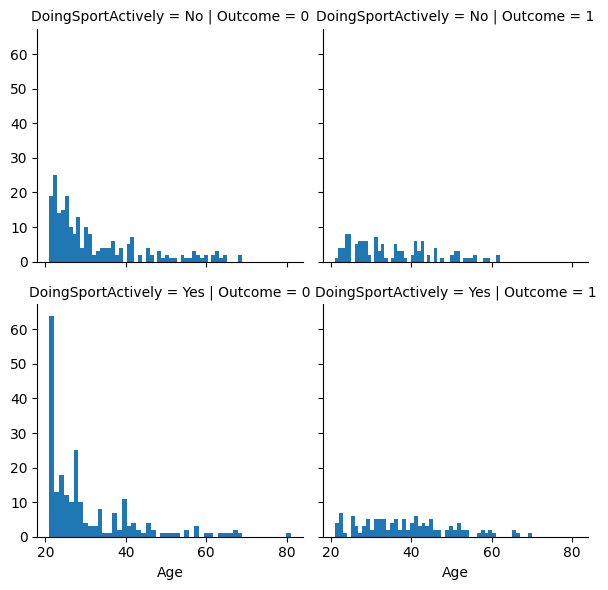

In [50]:
g=sns.FacetGrid(train_df,col="Outcome",row="DoingSportActively") # DoingSportActively sütunundaki her değerin Outcome sütunundaki her değerle incelenmesi ve Age sütununda göre dağılımının ekrana basılması
g.map(plt.hist,"Age",bins=50)
g.add_legend()
plt.show()

DoingSportActively sütunundaki her değerin Outcome sütunundaki her değerle incelenmesi ve Age sütununda göre dağılımı

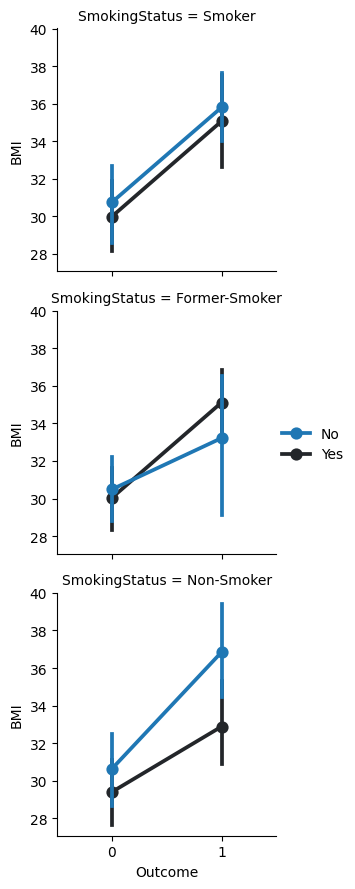

In [51]:
g=sns.FacetGrid(train_df,row="SmokingStatus")
g.map(sns.pointplot,"Outcome","BMI","DoingSportActively") # Her bir Pregnancies değerine göre Outcome ve BMI değerlerinin ekrana basılması
g.add_legend()
plt.show()

Her bir SmokingStatus değerine göre Outcome,BMI,ve DoingSportActively değerleri

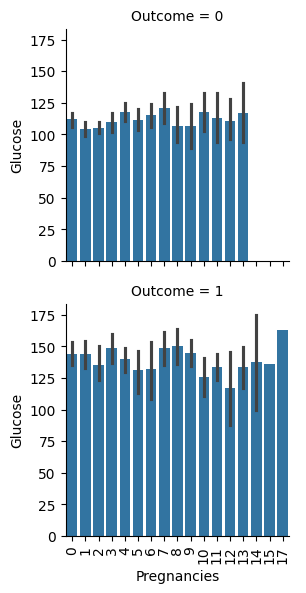

In [52]:
g=sns.FacetGrid(train_df,row="Outcome")
g.map(sns.barplot,"Pregnancies","Glucose") # Outcome değerlerinin her birisi için Pregnancies değerleri ve Glucose değerlerinin ekrana basılması
g.add_legend()
plt.xticks(rotation=90)
plt.show()

 Outcome değerlerinin her birisi için Pregnancies değerleri ve Glucose değerleri

In [53]:
train_df[train_df["SkinThickness"].isnull()] #SkinThickness sütunundaki boş değerlerin ekrana basılması 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Income($),Country,SmokingStatus,DoingSportActively,Name,Outcome


SkinThickness sütunundaki boş değerler

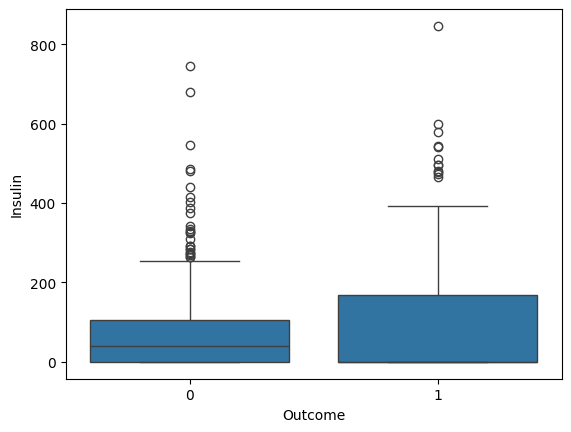

In [54]:
sns.boxplot(x="Outcome",y="Insulin",data=train_df)# Outcome değerlerine göre Insulin değerlerin dağılımının ekrana basılması
plt.show()

Outcome değerlerine göre Insulin değerlerin dağılımı

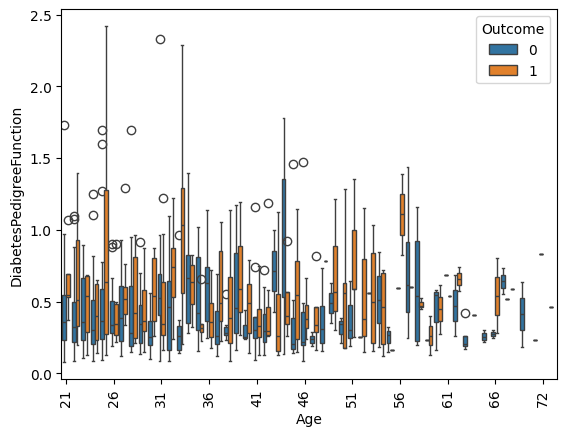

In [55]:
sorted_age = sorted(train_df['Age'].unique()) #Age sütunundaki değerlerin DiabetesPedigreeFuncton ve Outcome değerlerin dağılımının ekrana basılması
step_size = 5 
x_ticks_positions = np.arange(0, len(sorted_age), step_size)
x_labels = sorted_age[::step_size]
sns.boxplot(x="Age", y="DiabetesPedigreeFunction", hue="Outcome", data=train_df)
plt.xticks(rotation=90, ticks=x_ticks_positions, labels=x_labels)
plt.show()

Age sütunundaki değerlerin DiabetesPedigreeFuncton ve Outcome değerlerinin dağılımı

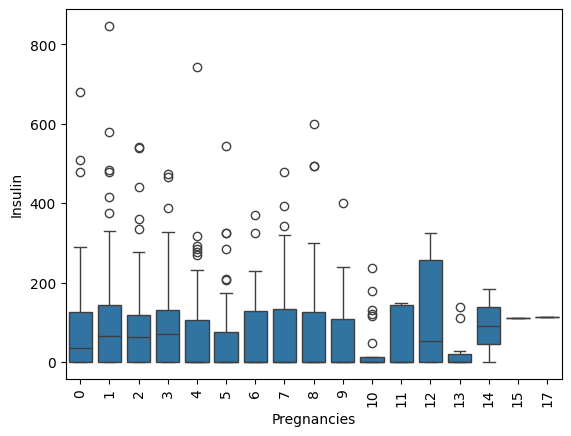

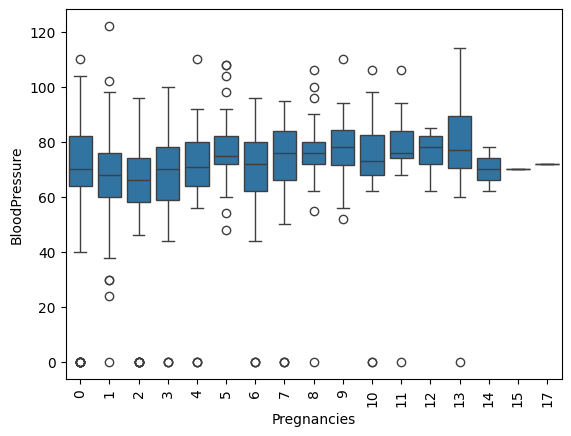

In [56]:
sns.boxplot(x="Pregnancies",y="Insulin",data=train_df)
plt.xticks(rotation=90)
plt.show()
sns.boxplot(x="Pregnancies",y="BloodPressure",data=train_df) # Insulin ve BloodPressure sütunlarındaki değerlerin Preganancies sütunundaki değerlere göre dağılımının ekrana basılması
plt.xticks(rotation=90)
plt.show()

 Insulin ve BloodPressure sütunlarındaki değerlerin Preganancies sütunundaki değerlere göre dağılımı

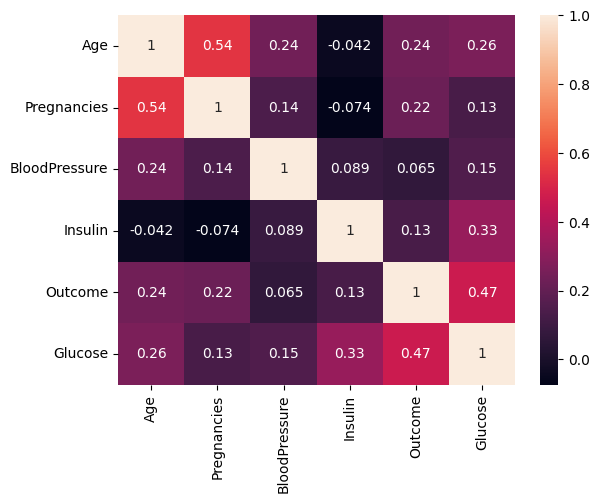

In [57]:
sns.heatmap(train_df[["Age","Pregnancies","BloodPressure","Insulin","Outcome","Glucose"]].corr(),annot=True) #Verilen sütunların birbirleri ile ilişkilerinin ekrana basılması
plt.show()

Yukarıdaki sütunların birbirleri ile ilişkileri

# Özellik Mühendisliği

In [58]:
train_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Income($),Country,SmokingStatus,DoingSportActively,Name,Outcome
0,2,84,0,0,0,0.0,0.304,21,9992.000000,NaN,Smoker,No,Miss. Agu Yılmaz,0
1,9,112,82,24,0,28.2,1.282,50,5135.000000,Egypt,Former-Smoker,Yes,Mrs. Deniz Rivera,1
2,1,139,46,19,83,28.7,0.654,22,8473.000000,USA,Former-Smoker,No,Miss. Rahi Yılmaz,0
3,0,161,50,0,0,21.9,0.254,65,3744.000000,France,Smoker,Yes,Mrs. Sophia Brown,0
4,6,134,80,37,370,46.2,0.238,46,5285.215318,Japan,Non-Smoker,No,Miss. Agu Yaghi,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,9,165,88,0,0,30.4,0.302,49,4069.000000,France,NaN,Yes,Miss. Abioye Hughes,1
764,1,77,56,30,56,33.3,1.251,24,2839.000000,Japan,Non-Smoker,No,Miss. Julie Samaha,0
765,8,95,72,0,0,36.8,0.485,57,2668.000000,Australia,Smoker,Yes,Mrs. Abioye Johnson,0
766,2,146,70,38,360,28.0,0.337,29,2627.000000,Japan,Non-Smoker,NaN,Miss. Rahi Smith,1


In [59]:

train_df["Name"].head(10) #Name sütunundaki ilk 10 değerin ekrana basılması

0        Miss. Agu Yılmaz
1       Mrs. Deniz Rivera
2       Miss. Rahi Yılmaz
3       Mrs. Sophia Brown
4         Miss. Agu Yaghi
5        Mrs. Zary Bassil
6         Mrs. Emma Yaghi
7    Miss. Carolina Aktaş
8      Miss. Abara Khazim
9    Mrs. Abioye Williams
Name: Name, dtype: object

Name sütununun ilk 10 değeri

In [60]:
name=train_df["Name"]
name

0          Miss. Agu Yılmaz
1         Mrs. Deniz Rivera
2         Miss. Rahi Yılmaz
3         Mrs. Sophia Brown
4           Miss. Agu Yaghi
               ...         
763     Miss. Abioye Hughes
764      Miss. Julie Samaha
765     Mrs. Abioye Johnson
766        Miss. Rahi Smith
767    Miss. Adeleke Bassil
Name: Name, Length: 768, dtype: object

In [61]:
x=[i.split(".")[0] for i in name] # Name sütunundaki değerlerin '.' işaretine göre ayrılması.
x

['Miss',
 'Mrs',
 'Miss',
 'Mrs',
 'Miss',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mrs',
 'Miss',
 'Mrs',
 'Mrs',
 'Mrs',
 'Mrs',
 'Mrs',
 'Miss',
 'Mrs',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Miss',
 'Miss',
 'Mrs',
 'Miss',
 'Mrs',
 'Mrs',
 'Miss',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Miss',
 'Mrs',
 'Miss',
 'Miss',
 'Mrs',
 'Miss',
 'Miss',
 'Miss',
 'Mrs',
 'Miss',
 'Mrs',
 'Miss',
 'Miss',
 'Mrs',
 'Miss',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Miss',
 'Mrs',
 'Mrs',
 'Mrs',
 'Mrs',
 'Mrs',
 'Mrs',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Miss',
 'Mrs',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Miss',
 'Mrs',
 'Miss',
 'Miss',
 'Miss',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mrs',
 'Miss',
 'Mrs',
 'Miss',
 'Miss',
 'Mrs',
 'Miss',
 'Mrs',
 'Miss',
 'Miss',
 'Mrs',
 'Miss',
 'Miss',
 'Mrs',
 'Miss

Name sütunundaki değerlerin unvanları

In [62]:
train_df["Title"]=[i.split(".")[0] for i in name] # Name sütunundaki unvanların Title sutununa aktarılması ve ekrana basılması
title=train_df["Title"].head(10)

Yeni oluşturulan title sütununun değerleri


In [63]:
df_cerceve2=pd.DataFrame(title) #Title sütunundan bir dataframe oluşturulması
df_cerceve2

,Title
0,Miss
1,Mrs
2,Miss
3,Mrs
4,Miss
5,Mrs
6,Mrs
7,Miss
8,Miss
9,Mrs


Yeni oluşturulan dataframe'in değerleri

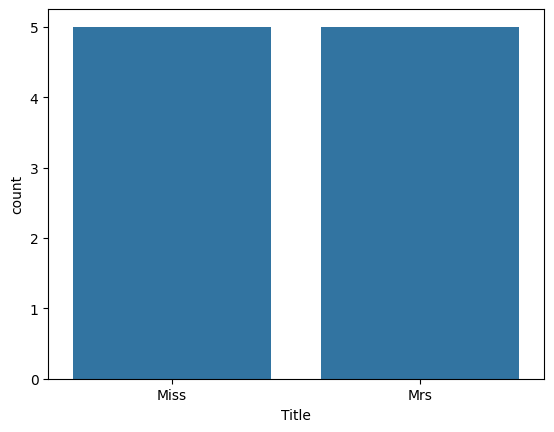

In [64]:
sns.countplot(x="Title",data=df_cerceve2)# df_cerceve2 dataframeindeki değerlerin sayısal dağılımının ekrana basılması
plt.show()

 df_cerceve2 dataframeindeki değerlerin sayısal dağılımının ekrana basılması

In [65]:
train_df["Title"]

0      Miss
1       Mrs
2      Miss
3       Mrs
4      Miss
       ... 
763    Miss
764    Miss
765     Mrs
766    Miss
767    Miss
Name: Title, Length: 768, dtype: object

In [66]:
title_mapping={'Miss':0,'Mrs':1}
train_df['Title']=train_df['Title'].map(title_mapping) # Title sütunundaki değerleri numerik değerlere çevirme işlemi ve ekrana basılması
train_df['Title'].head(20)


0     0
1     1
2     0
3     1
4     0
5     1
6     1
7     0
8     0
9     1
10    0
11    1
12    1
13    1
14    1
15    1
16    0
17    1
18    1
19    1
Name: Title, dtype: int64

Title sütunundaki numerik veriye dönüştürülmüş değerlerin ekrana basılması

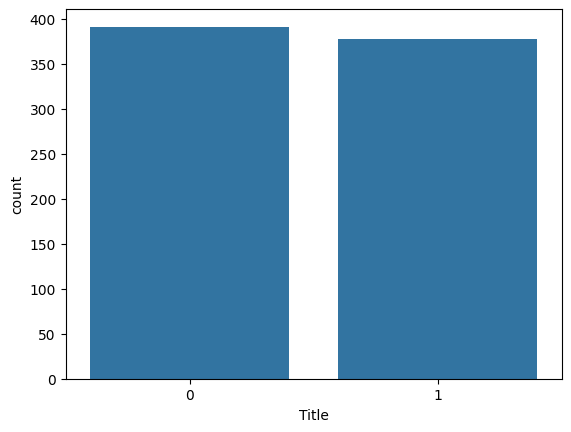

In [67]:
sns.countplot(x="Title",data=train_df)
plt.show()

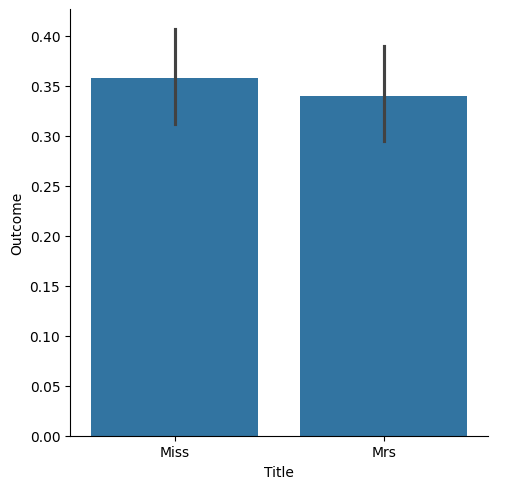

In [68]:
g=sns.catplot(x="Title",y="Outcome",data=train_df,kind="bar")
g.set_xticklabels(["Miss","Mrs"])
g.set_ylabels("Outcome")

In [69]:
train_df.drop(labels=["Name"],axis=1,inplace=True) #Train df içerisindeki Name sütununun düşürülmesi

In [70]:
train_df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Income($),Country,SmokingStatus,DoingSportActively,Outcome,Title
0,2,84,0,0,0,0.0,0.304,21,9992.000000,NaN,Smoker,No,0,0
1,9,112,82,24,0,28.2,1.282,50,5135.000000,Egypt,Former-Smoker,Yes,1,1
2,1,139,46,19,83,28.7,0.654,22,8473.000000,USA,Former-Smoker,No,0,0
3,0,161,50,0,0,21.9,0.254,65,3744.000000,France,Smoker,Yes,0,1
4,6,134,80,37,370,46.2,0.238,46,5285.215318,Japan,Non-Smoker,No,1,0


In [71]:
train_df=pd.get_dummies(train_df,columns=["Title"]) #Title sütununun değerlerine one hot encoding işleminin uygulanması
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Income($),Country,SmokingStatus,DoingSportActively,Outcome,Title_0,Title_1
0,2,84,0,0,0,0.0,0.304,21,9992.000000,NaN,Smoker,No,0,1,0
1,9,112,82,24,0,28.2,1.282,50,5135.000000,Egypt,Former-Smoker,Yes,1,0,1
2,1,139,46,19,83,28.7,0.654,22,8473.000000,USA,Former-Smoker,No,0,1,0
3,0,161,50,0,0,21.9,0.254,65,3744.000000,France,Smoker,Yes,0,0,1
4,6,134,80,37,370,46.2,0.238,46,5285.215318,Japan,Non-Smoker,No,1,1,0


Title sütununa onehotencoding işlemi uygulandıktan sonra train df'nin son hali.

# COUNTRY

In [72]:
train_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Income($),Country,SmokingStatus,DoingSportActively,Outcome,Title_0,Title_1
0,2,84,0,0,0,0.0,0.304,21,9992.000000,NaN,Smoker,No,0,1,0
1,9,112,82,24,0,28.2,1.282,50,5135.000000,Egypt,Former-Smoker,Yes,1,0,1
2,1,139,46,19,83,28.7,0.654,22,8473.000000,USA,Former-Smoker,No,0,1,0
3,0,161,50,0,0,21.9,0.254,65,3744.000000,France,Smoker,Yes,0,0,1
4,6,134,80,37,370,46.2,0.238,46,5285.215318,Japan,Non-Smoker,No,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,9,165,88,0,0,30.4,0.302,49,4069.000000,France,NaN,Yes,1,1,0
764,1,77,56,30,56,33.3,1.251,24,2839.000000,Japan,Non-Smoker,No,0,1,0
765,8,95,72,0,0,36.8,0.485,57,2668.000000,Australia,Smoker,Yes,0,0,1
766,2,146,70,38,360,28.0,0.337,29,2627.000000,Japan,Non-Smoker,NaN,1,1,0


In [73]:
train_df["Country"].head()

0       NaN
1     Egypt
2       USA
3    France
4     Japan
Name: Country, dtype: object

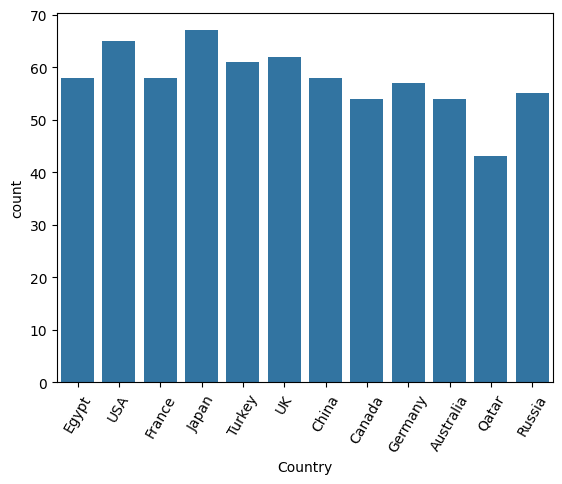

In [74]:
sns.countplot(x="Country",data=train_df)
plt.xticks(rotation=60)
plt.show()

In [75]:
train_df=pd.get_dummies(train_df,columns=["Country"])# Country sütunundaki değerlere onehot encoding işleminin uygulanması. 
train_df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Income($),SmokingStatus,...,Country_China,Country_Egypt,Country_France,Country_Germany,Country_Japan,Country_Qatar,Country_Russia,Country_Turkey,Country_UK,Country_USA
0,2,84,0,0,0,0.0,0.304,21,9992.000000,Smoker,...,0,0,0,0,0,0,0,0,0,0
1,9,112,82,24,0,28.2,1.282,50,5135.000000,Former-Smoker,...,0,1,0,0,0,0,0,0,0,0
2,1,139,46,19,83,28.7,0.654,22,8473.000000,Former-Smoker,...,0,0,0,0,0,0,0,0,0,1
3,0,161,50,0,0,21.9,0.254,65,3744.000000,Smoker,...,0,0,1,0,0,0,0,0,0,0
4,6,134,80,37,370,46.2,0.238,46,5285.215318,Non-Smoker,...,0,0,0,0,1,0,0,0,0,0


# SmokingStatus

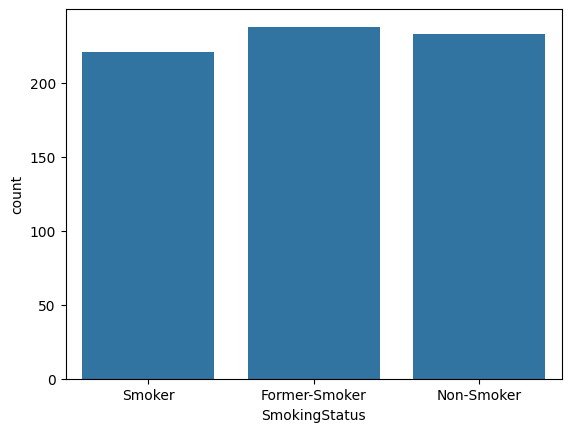

In [76]:
sns.countplot(x="SmokingStatus",data=train_df)
plt.show()

In [77]:
train_df=pd.get_dummies(train_df,columns=["SmokingStatus"])
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Income($),DoingSportActively,...,Country_Germany,Country_Japan,Country_Qatar,Country_Russia,Country_Turkey,Country_UK,Country_USA,SmokingStatus_Former-Smoker,SmokingStatus_Non-Smoker,SmokingStatus_Smoker
0,2,84,0,0,0,0.0,0.304,21,9992.000000,No,...,0,0,0,0,0,0,0,0,0,1
1,9,112,82,24,0,28.2,1.282,50,5135.000000,Yes,...,0,0,0,0,0,0,0,1,0,0
2,1,139,46,19,83,28.7,0.654,22,8473.000000,No,...,0,0,0,0,0,0,1,1,0,0
3,0,161,50,0,0,21.9,0.254,65,3744.000000,Yes,...,0,0,0,0,0,0,0,0,0,1
4,6,134,80,37,370,46.2,0.238,46,5285.215318,No,...,0,1,0,0,0,0,0,0,1,0


# DoingSportActively

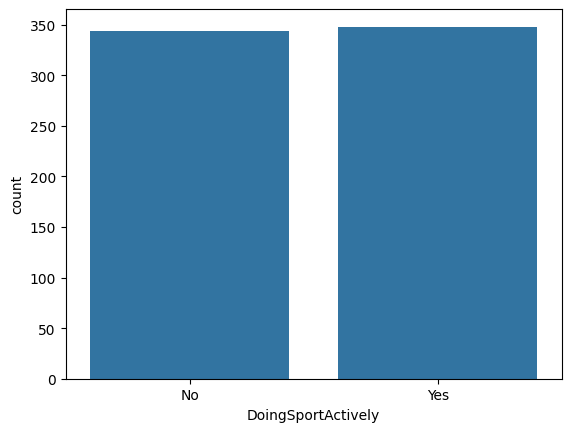

In [78]:
sns.countplot(x="DoingSportActively",data=train_df)
plt.show()

In [79]:
train_df=pd.get_dummies(train_df,columns=["DoingSportActively"])
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Income($),Outcome,...,Country_Qatar,Country_Russia,Country_Turkey,Country_UK,Country_USA,SmokingStatus_Former-Smoker,SmokingStatus_Non-Smoker,SmokingStatus_Smoker,DoingSportActively_No,DoingSportActively_Yes
0,2,84,0,0,0,0.0,0.304,21,9992.000000,0,...,0,0,0,0,0,0,0,1,1,0
1,9,112,82,24,0,28.2,1.282,50,5135.000000,1,...,0,0,0,0,0,1,0,0,0,1
2,1,139,46,19,83,28.7,0.654,22,8473.000000,0,...,0,0,0,0,1,1,0,0,1,0
3,0,161,50,0,0,21.9,0.254,65,3744.000000,0,...,0,0,0,0,0,0,0,1,0,1
4,6,134,80,37,370,46.2,0.238,46,5285.215318,1,...,0,0,0,0,0,0,1,0,1,0
